### MMR(Maximal Marginal Relevance)

    粗排序、精排后进入筛选漏斗阶段候选物品队列。
    既要保证候选物品排序分数高, 又要具有多样性

In [1]:
%cd /playground/sgd_deep_learning/sgd_rec_sys/
import sys 
sys.path.append('./python')

/playground/sgd_deep_learning/sgd_rec_sys


In [2]:
import numpy as np
from sgd_rec_sys.reorder import mmr, Item

In [3]:
# 准备三个物品，选其中的两个
a1 = Item(id=1)
a1.set_reward(0.9)
a1.set_emb(np.array([1,1]))

a2 = Item(id=2)
a2.set_reward(0.8)
a2.set_emb(np.array([2, 0.5]))

a3 = Item(id=3)
a3.set_reward(0.6)
a3.set_emb(np.array([-1,-1]))

items= [a1,a2,a3,]

### 可视化物品相似度

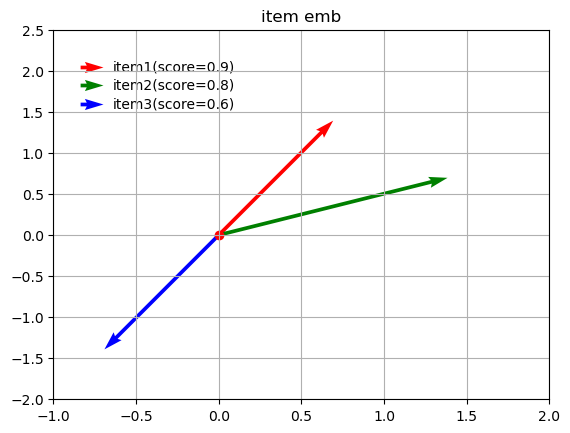

In [4]:
import numpy as np
import matplotlib.pyplot as plt
  


  
# Directional vectors
U = [item.emb[0] for item in items]
V = [item.emb[1] for item in items] 

# Vector origin location
X = [0]* len(U)
Y = [0]* len(V)

labs = ["item1(score=0.9)","item2(score=0.8)", "item3(score=0.6)"]


# Creating plot
q = plt.quiver(X, Y, U, V, color=["r","g",'b'], units='xy', scale=1)
plt.quiverkey(q, .1, .9, .2, labs[0], color='r', labelpos='E')
plt.quiverkey(q, .1, .85, .2, labs[1], color='g', labelpos='E')
plt.quiverkey(q, .1, .8, .2, labs[2], color='b', labelpos='E')


plt.title('item emb')

# plotting origin point
plt.scatter([0], [0], color="red") 
  
# x-lim and y-lim
plt.xlim(-1, 2)
plt.ylim(-2, 2.5)
  
# Show plot with grid
plt.grid()
plt.show()

In [5]:
# theta调参 
theta = 0.5
k = 2

ids = mmr(items, k, theta, w=0)
print(ids) # [1, 3] mmr算法折中选取了物品1和3, 物品2虽然排序分数较高0.8， 但是和物品1过于相似。

[1, 3]


## 测试带窗口w=2的物品队列

In [6]:
# 准备四个物品，选其中的3个， w=1 只考虑前一个物品的相似度
a1 = Item(id=1)
a1.set_reward(0.9)
a1.set_emb(np.array([1,1]))

a2 = Item(id=2)
a2.set_reward(0.8)
a2.set_emb(np.array([2, 0.5]))

a3 = Item(id=3)
a3.set_reward(0.6)
a3.set_emb(np.array([-1,-1]))

a4 = Item(id=4)
a4.set_reward(0.6)
a4.set_emb(np.array([-1, 1]))

items= [a1,a2,a3, a4]

### 可视化物品相似度

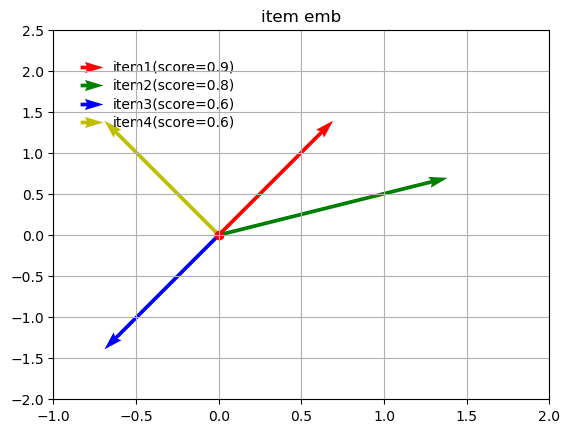

In [7]:
# Directional vectors
U = [item.emb[0] for item in items]
V = [item.emb[1] for item in items] 

# Vector origin location
X = [0]* len(U)
Y = [0]* len(V)

labs = ["item1(score=0.9)","item2(score=0.8)", "item3(score=0.6)", "item4(score=0.6)"]


# Creating plot
q = plt.quiver(X, Y, U, V, color=["r","g",'b','y'], units='xy', scale=1)
plt.quiverkey(q, .1, .9, .2, labs[0], color='r', labelpos='E')
plt.quiverkey(q, .1, .85, .2, labs[1], color='g', labelpos='E')
plt.quiverkey(q, .1, .8, .2, labs[2], color='b', labelpos='E')
plt.quiverkey(q, .1, .75, .2, labs[3], color='y', labelpos='E')


plt.title('item emb')

# plotting origin point
plt.scatter([0], [0], color="red") 
  
# x-lim and y-lim
plt.xlim(-1, 2)
plt.ylim(-2, 2.5)
  
# Show plot with grid
plt.grid()
plt.show()

In [8]:
# theta调参 
ids = mmr(items, k=3, theta=0.5, w=1)
print(ids) 

"""
[1, 3, 2] 
窗口大小为1，说明每一次只需要选择与前一个位置不相同的item即可。
所以得分第二高的item2,与item3不相似,可以被选中。即时item2与item1比较相似。

窗口w的设置符合预期效果。
"""


[1, 3, 2]


'\n[1, 3, 2] \n窗口大小为1，说明每一次只需要选择与前一个位置不相同的item即可。\n所以得分第二高的item2,与item3不相似,可以被选中。即时item2与item1比较相似。\n\n窗口w的设置符合预期效果。\n'